In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sb
%matplotlib inline

In [2]:
production = pd.read_csv('Africa Food Production (2004 - 2013).csv')
supply = pd.read_csv('Africa Food Supply (2004 - 2013).csv')

In [3]:
#check production dataset
production.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [4]:
#check supply datset
supply.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [5]:
#check production info
production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [6]:
#check supply info
supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [10]:
#check unique items in production dataset
production['Item'].unique()

array(['Wheat and products', 'Rice (Milled Equivalent)',
       'Barley and products', 'Maize and products', 'Oats',
       'Sorghum and products', 'Cereals, Other', 'Potatoes and products',
       'Sugar beet', 'Sugar (Raw Equivalent)', 'Honey', 'Beans', 'Peas',
       'Pulses, Other and products', 'Nuts and products',
       'Groundnuts (Shelled Eq)', 'Sunflower seed',
       'Rape and Mustardseed', 'Cottonseed',
       'Olives (including preserved)', 'Groundnut Oil',
       'Sunflowerseed Oil', 'Rape and Mustard Oil', 'Olive Oil',
       'Oilcrops Oil, Other', 'Tomatoes and products', 'Onions',
       'Vegetables, Other', 'Oranges, Mandarines',
       'Lemons, Limes and products', 'Grapefruit and products',
       'Citrus, Other', 'Bananas', 'Apples and products', 'Dates',
       'Grapes and products (excl wine)', 'Fruits, Other', 'Pimento',
       'Wine', 'Beer', 'Beverages, Alcoholic', 'Bovine Meat',
       'Mutton & Goat Meat', 'Pigmeat', 'Poultry Meat', 'Meat, Other',
       'Of

### Although this dataset contains 94 food items, the world as a whole produces and consumes some certain food crops in excess, so I will be focusing on those food items to see how their production and supply affects food shortage.

In [11]:
#create new datset with most important food items
excess_production = production[production["Item"].isin(['Cassava and products','Sugar cane', 'Poultry Meat',  'Mutton & Goat Meat', 'Pigmeat'
                                                       'Milk - Excluding Butter','Bananas', 'Wheat and products', 'Rice (Milled Equivalent)',
                                                       'Soyabeans', 'Palm Oil', 'Maize and products','Potatoes and products',
                                                       'Eggs','Apples and products','Nuts and products','Cottonseed','Sugar beet','Barley and products',
                                                        'Tomatoes and products', 'Vegetables, Other'])]

In [15]:
#check new datset
excess_production.sample(5)

,Country,Item,Year,Value
16028,Rwanda,Maize and products,2012,573
1413,Benin,Tomatoes and products,2007,127
8878,Guinea-Bissau,Sugar cane,2012,6
13581,Morocco,Bananas,2005,190
10646,Madagascar,Wheat and products,2010,12


In [184]:
# function to plot bar plot with seaborn
def countplot(data, xvar):
    #base color
    base_color = sb.color_palette()[3]
    
    #plot dimensions
    plt.figure(figsize=(10, 6))
    
    #plot
    sb.countplot(data = data, x = xvar, color = base_color,  order = data[xvar].value_counts(ascending = True).index);
    
    #add x label
    plt.xlabel(xvar.title(), fontsize = 13, weight = 'bold')
    
    #add y label
    plt.ylabel('Frequency'.title(), fontsize = 13, weight = 'bold')

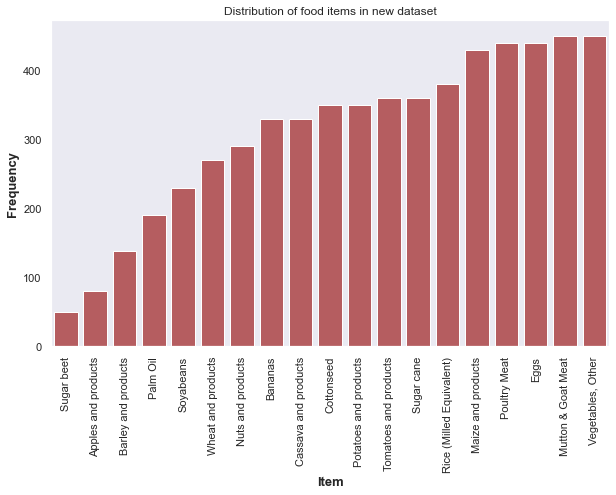

In [185]:
#bar plot to see the distribution of food items in new dataset
countplot(excess_production, 'Item')
plt.xticks(rotation = 90);
sb.set(style="dark");
plt.title('Distribution of food items in new dataset');

### From the above plot we can see that even among the most produced foods, some are massively produced than others. The top 8 produced foods include vegetables, mutton & goat meat, Eggs, Poultry meat, Maize and products, Rice, Sugarcane and Tomatoes and products.

In [38]:
#check key statistics for new dataset
excess_production.describe(include = 'all')

,Country,Item,Year,Value
count,5918,5918,5918.000000,5918.000000
unique,45,19,NaN,NaN
top,Madagascar,"Vegetables, Other",NaN,NaN
freq,170,450,NaN,NaN
mean,NaN,NaN,2008.498648,721.607131
std,NaN,NaN,2.872053,2573.699346
min,NaN,NaN,2004.000000,0.000000
25%,NaN,NaN,2006.000000,8.000000
50%,NaN,NaN,2008.000000,48.000000
75%,NaN,NaN,2011.000000,371.000000


### From the table above we can see that the most mentioned country is madagascar being mentioned 170 times, the most produced item is vegetable/other validating the distribution of food items plot above, and most food item's value fall in the 48 range. With a food item displaying an outlier value of 54000 and 0 respectively.

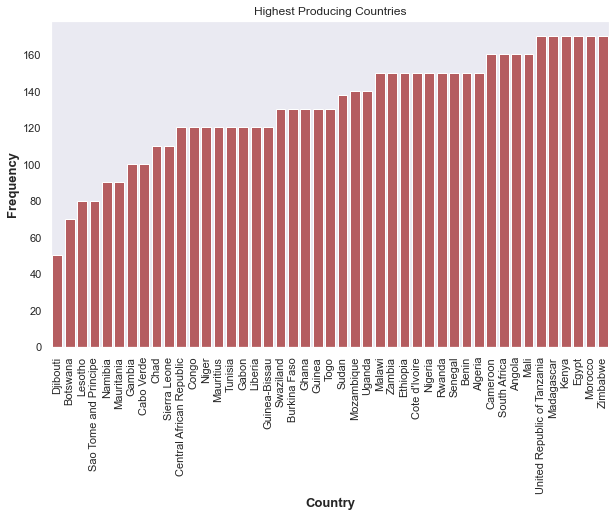

In [186]:
#Let's see how other countries compare to madagascar in food production as they are one of the most mentioned countries from the
#plot above
countplot(excess_production, 'Country')
plt.xticks(rotation = 90);
sb.set(style="dark");
plt.title('Highest Producing Countries');

### From the plot above we can see food production is heavily skewed in favor of certain countries namely: Tanzania, madagascar, Kenya, Egypt, Morocco, Zimbabwe. While some other countries are heavily lacking in food production namely: Djibouti, Botswana, Lesotho, sao tome and principe, namibia and mauritania.

In [53]:
#check which row has an outlier value of 54000
highest_outlier = excess_production[excess_production["Value"] == 54000]
outlier.head()

,Country,Item,Year,Value
15448,Nigeria,Cassava and products,2012,54000


### We can see above that Nigeria produced a very large amount(outlier) of cassava in the year 2012.

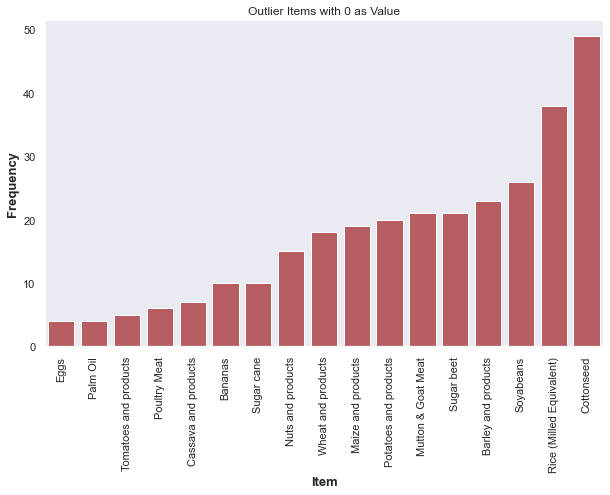

In [187]:
#check which rows had an outlier value of 0
lowest_outliers = excess_production[excess_production["Value"] == 0]
lowest_outliers['Item'].unique()
#plot outlier items with 0 as value
countplot(lowest_outliers, 'Item')
plt.xticks(rotation = 90);
sb.set(style="dark");
plt.title('Outlier Items with 0 as Value');

### we can see from the plot above that there were alot of years were cottonseed and rice were not produced at all, this is bad because rice especially is a most sought after food by majority of the world population.

In [27]:
#check highest produced foods from 2004 to 2008
first_years = excess_production[excess_production["Year"].isin([2004, 2005, 2006, 2007, 2008])]

In [31]:
#check dataset
first_years.sample(5)

,Country,Item,Year,Value
630,Angola,Cassava and products,2004,8587
8902,Guinea-Bissau,Nuts and products,2006,95
17794,South Africa,Maize and products,2008,12700
6660,Ethiopia,Tomatoes and products,2004,36
11820,Mali,Rice (Milled Equivalent),2004,479


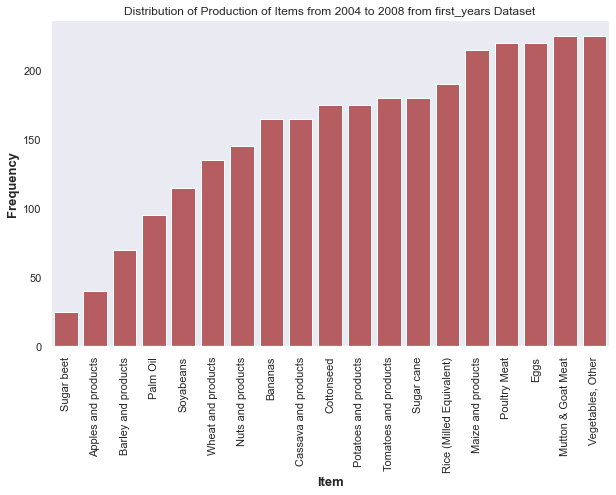

In [188]:
#plot distribution of production of items from 2004 to 2008 from first_years dataset
countplot(first_years, 'Item')
plt.xticks(rotation = 90);
sb.set(style="dark");
plt.title('Distribution of Production of Items from 2004 to 2008 from first_years Dataset');

### From the plot above the top 8 produced foods stays relatively the same from 2004 to 2008.

In [33]:
#check highest produced foods from 2009 to 2013
last_years = excess_production[excess_production["Year"].isin([2009, 2010, 2011, 2012, 2013])]

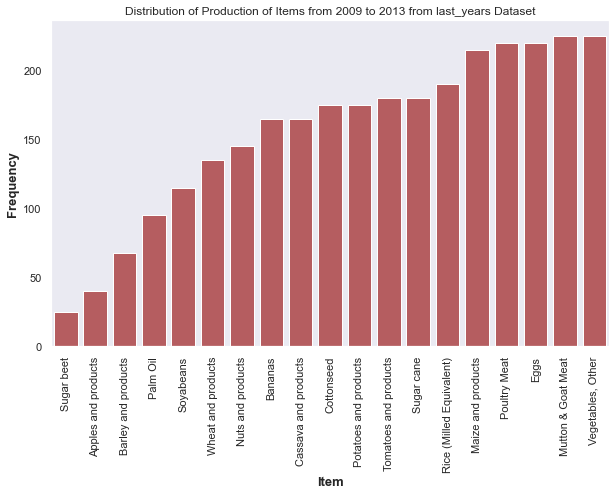

In [189]:
#plot distribution of production of items from 2009 to 2013 from above dataset
countplot(last_years, 'Item')
plt.xticks(rotation = 90);
sb.set(style="dark");
plt.title('Distribution of Production of Items from 2009 to 2013 from last_years Dataset');

### From the plot above we can see that the top 8 most produced foods stay relatively the same from 2009 to 2013 further confirming our bias that some foods are disproportionately produced than others.

In [93]:
#Now lets see which countries produce the most and least of the most produced foods over the years in the excess production dataset
Item =  excess_production[excess_production["Item"].isin(['Rice (Milled Equivalent)', 'Vegetables, Other', 'Mutton & Goat Meat',
                                                        'Maize and products','Poultry Meat', 'Eggs','Sugar cane' ])]
Highest = Item.groupby("Country")["Value"].sum().sort_values(ascending=False)
print(Highest.head())

Country
Egypt                          369913
South Africa                   329657
Nigeria                        212769
Kenya                          100491
United Republic of Tanzania     96705
Name: Value, dtype: int64


### We can see that Egypt is the highest producing country of the most produced foods closely followed by SouthAfrica, Nigeria, Kenya and Tanzania. We can also that food production is not region specific as these 5 countries are in different parts of Africa.

In [94]:
#lowest producing countries
print(Highest.tail())

Country
Gambia                   844
Cabo Verde               603
Botswana                 602
Djibouti                 345
Sao Tome and Principe    101
Name: Value, dtype: int64


### We can see that Sao Tome and Principe produces the lowest amount of the most produced foods, they are closely followed by Djibouti, Botswana, Cabo verde and Gambia. This is not a good sign because the gap between most and least producing countries is too large. If food shortage is to be solved then this discrepancy must be handled.

In [115]:
#Now let's check the countries that supply/consume the most food.
h_supply = supply.groupby("Country")["Value"].sum().sort_values(ascending=False)
h_supply.head(5)

Country
Egypt        34580
Tunisia      33055
Morocco      32967
Algeria      31118
Mauritius    30543
Name: Value, dtype: int64

### We can see an interesting scenario here, the top five producing countries does not correlate with the top five supplying/consuming countries, Only Egypt appears in both lists. We can also observe that 99percent of the countries in this list are from north Afirca.

In [114]:
h_supply.tail(5)

Country
Central African Republic    20719
Madagascar                  20608
Chad                        20511
Ethiopia                    20292
Zambia                      18701
Name: Value, dtype: int64

### We can also see another discrepancy here as the lowest producing countries does not correlate with the lowest supplying/consuming countries.

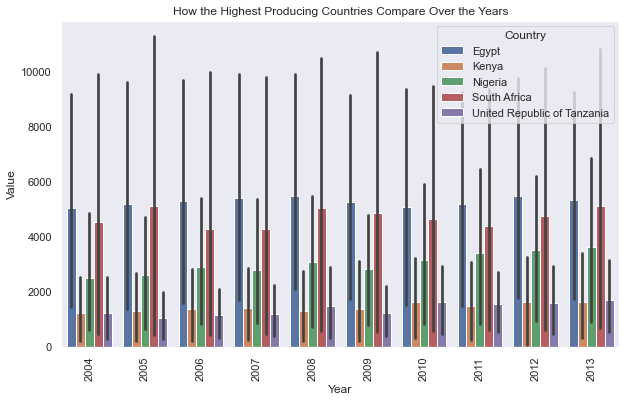

In [190]:
### let's see how the highest producing countries compare over the years
h_country =  Item[Item["Country"].isin(['Egypt', 'South Africa', 'Nigeria', 'Kenya', 'United Republic of Tanzania'])]
plt.figure(figsize=(10, 6));
sb.barplot(x='Year', y='Value', hue='Country', data=h_country);
plt.xticks(rotation = 90);
sb.set(style="dark");
plt.title('How the Highest Producing Countries Compare Over the Years');

### From the above plot we can see that over the years Egypt, Nigeria and South Africa have generally been consistent in food production.

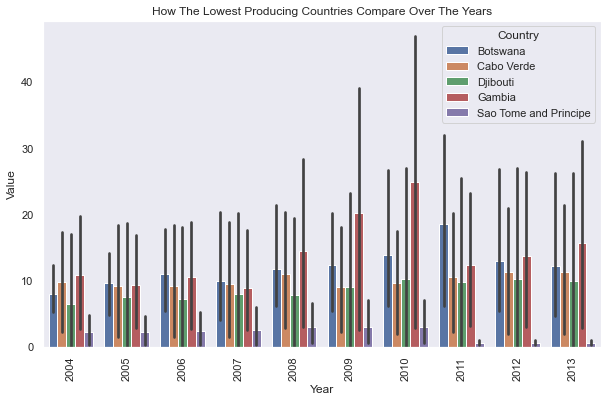

In [191]:
### lets see how the lowest producing countries compare over the years
l_country = Item[Item["Country"].isin(['Gambia', 'Cabo Verde', 'Botswana', 'Djibouti', 'Sao Tome and Principe'])]
plt.figure(figsize=(10, 6));
sb.barplot(x='Year', y='Value', hue='Country', data=l_country);
plt.xticks(rotation = 90);
sb.set(style="dark");
plt.title('How The Lowest Producing Countries Compare Over The Years');

### From the plot above we can see that sao Tome and principe and Djibouti have consistently been producing the least amount of food.

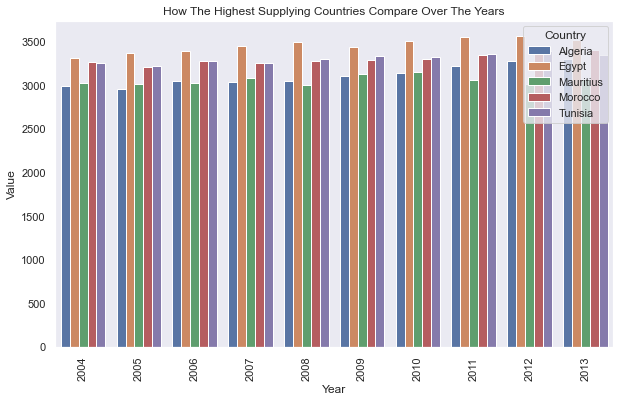

In [177]:
# let's see how the highest supplying countries compare over the years
highest_supply = supply[supply["Country"].isin(['Egypt', 'Tunisia', 'Algeria', 'Morocco', 'Mauritius'])]
plt.figure(figsize=(10, 6));
sb.barplot(x='Year', y='Value', hue='Country', data=highest_supply);
plt.xticks(rotation = 90);
sb.set(style="dark");
plt.title('How The Highest Supplying Countries Compare Over The Years');

### From the plot above Egypt, morroco and Tunisia have consistently being supplying food over the years.

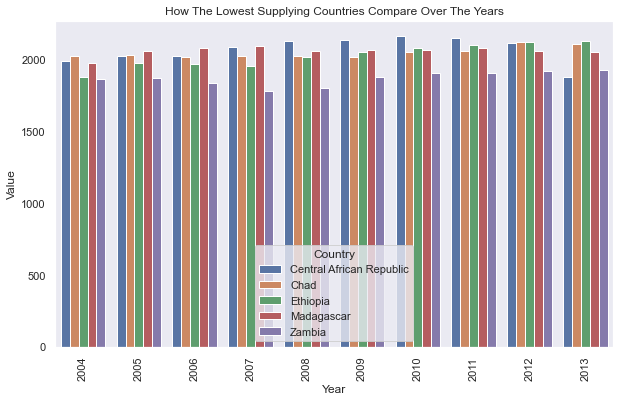

In [178]:
#let's see how the lowest supplying countries compare over the years
lowest_supply = supply[supply["Country"].isin(['Central African Republic', 'Madagascar', 'Chad', 'Zambia', 'Ethiopia'])]
plt.figure(figsize=(10, 6));
sb.barplot(x='Year', y='Value', hue='Country', data=lowest_supply);
plt.xticks(rotation = 90);
sb.set(style="dark");
plt.title('How The Lowest Supplying Countries Compare Over The Years');

### From the plot above we can see that Ethiopia, Chad and Madagascar have consistently supplied the least amount of food.

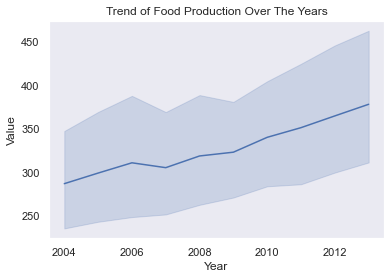

In [179]:
#let's check the trend of food production over the years
sb.lineplot(data = production, x = 'Year', y = 'Value');
sb.set(style="dark");
plt.title('Trend of Food Production Over The Years');

### Food production over the course of 9 years shows an upward trend.

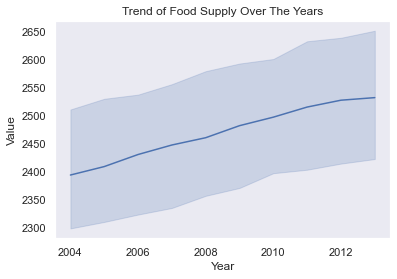

In [181]:
#let's check the trend of food supply over the years
sb.lineplot(data = supply, x = 'Year', y = 'Value');
sb.set(style="dark");
plt.title('Trend of Food Supply Over The Years');

### Food supply over the course of 9 years shows an upward trend.

### From my investigations we can see that the most produced foods are Rice, vegetable, mutton & goat meat, poultry meat, eggs, maize and sugarcane. over the course of 9 years these foods have consitently been in the top produced foods. The most produced food item is vegetable and this is no surprise as you can grow vegetables almost anywhere, it mostly requires sunlight which Africa is largely blessed with. The value of cassava produced in 2012 in Nigeria was 54000, a large number whichh comes as no surprise though because cassave and its products serve as food to about 90 per cent of Nigerian households. Rice, cottonseed and soyabeans have 0 values in alot of rows, which is not good especially because rice is a major food source. The top 5 countries in terms of food production for the major sources of food are Egypt , South Africa, Nigeria, Kenya and Tanzania. This shows us that food production is not concentrated regionally. The top 5 countries in terms of lowest food production are sao Tome and principe, Djibouti, Gambia, cabo verde and Botswana, the gap between these countries and the top producing ones is very large which is not good as food production should be evenly shared among countries to effectively reduce food shortage and increase food security. 

### The top 5 countries for food supply/consumption include four north african countries namely: Egypt, Algeria, Tunisia, Morocco and then Mauritius. It is not surprising that four north African countries are among the top suppliers as North Africa is an economically prosperous area, generating one-third of Africa's total GDP. Central African Republic. Madagascar, Chad, Ethiopia, and Zambia are among the top 5 countries with the lowest supply/consumption of food. Egypt, Nigeria and South Africa have generally been consistent in food production over the course of 9 years period, this would indicate that these countries have thriving farming sectors and have cultivated good farming practices that other less producing nations could learn from. Sao Tome and principe and Djibouti have consistently been producing the least amount of food, they will need to revamp their agriculture sectors and adopt better farming practices in order to lighten the load on other countries and contribute to curbing food shortage. Egypt, morroco and Tunisia have consistently being supplying the most food over the years. Ethiopia, Chad and Madagascar have consistently supplied the least amount of food. 

### Food supply and production show an upward trend over the course of 9 years indicating that food production is increasing while supply and consumption is keeping pace with it. It appears that to solve the food shortage problem some countries eg, Ethiopia, Djibouti and Sao Tome and Principe would need to improve their farming practices. Struggling countries can also increase their vegetable farming as it is a major source of food while being relatively easy to grow. It also seems like some foods grow better in some particular countries eg cassava in Nigeria, so it would be wise for countries to find out which food crops grow better in their weather and environ in order to focus on those crops. Also, the upward trend of both food production and supply is good telling us that the current farming sectors and practices can keep up with an increasing demand for food.

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Story_of_How_the_World_Food_Shortage_Problem_can_be_Solved.ipynb --to slides --post serve --no-input --no-prompt